In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 450

In [2]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/individual_Samples/HK3524_raw.h5ad")

In [3]:
adata.layers["counts"] = adata.X.copy()

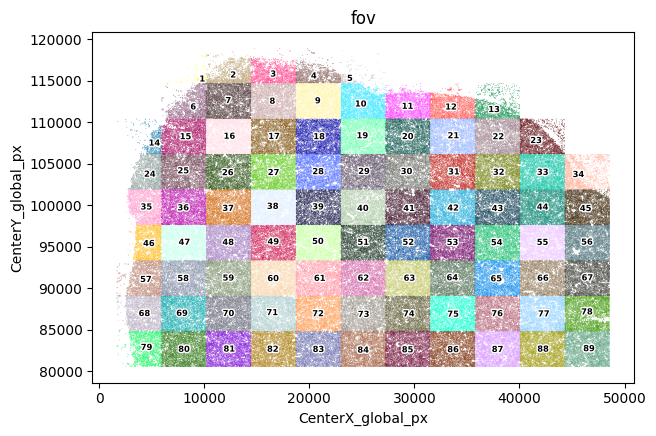

In [4]:
sc.pl.scatter(
    adata,
    x="CenterX_global_px",
    y="CenterY_global_px",
    color="fov",
    size=1,
    legend_loc = 'on data', legend_fontsize=6,
    legend_fontoutline=2
)

In [5]:
adata_merge = sc.read_h5ad("/home/levinsj/spatial/adata/project_Files/Fetal/model2/fetal_PostSCANVI_imputedExpression.h5ad")
adata_merge = adata_merge[adata_merge.obs["sample"] == "0"]


In [6]:
#adata_merge.obs = adata_merge.obs.set_index(adata_merge.obs.index.map(lambda x: f"c_{x}"))
adata_merge.obs.index = adata_merge.obs.index.str.replace('-1', '')
adata = adata[adata_merge.obs_names, :]


In [7]:
adata_plot = ad.AnnData(adata_merge.layers["SCVI_imputed"])
adata_plot.layers["SCVI_Imputed"] = adata_plot.X.copy()

adata_plot.obs_names = adata_merge.obs_names
adata_plot.var_names = adata_merge.var_names

adata_plot.obs = adata.obs
adata_plot.uns = adata.uns
adata_plot.obsm = adata.obsm

In [8]:
print(adata_plot)

AnnData object with n_obs × n_vars = 178787 × 24485
    obs: 'cell', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'slide_ID', 'Run_Tissue_name', 'Panel', 'CenterX_global_px', 'CenterY_global_px', 'cell_ID', 'sample', 'type', 'meanCounts_perFOV'
    uns: '20_micron_neighbors', '50_micron_neighbors', 'Run_Tissue_name_colors', 'sample_colors', 'spatial', 'type_colors', 'fov_colors'
    obsm: 'spatial', 'spatial_fov'
    layers: 'SCVI_Imputed'


In [ ]:
sc.pl.scatter(
    adata_plot,
    x="CenterX_global_px",
    y="CenterY_global_px",
    color="fov",
    size=1,
    legend_loc = 'on data', legend_fontsize=6,
    legend_fontoutline=2
)
fov_include_GLOM = ['49', '50',  '51', '60', '61', '62', '71' , '72','73' ]
fov_include_NZ = ['79', '68',  '57', '46', '80', '69', '58' , '47' ]


# Apply dark background style
plt.style.use('dark_background')
plt.rcParams['figure.facecolor'] = 'none'  # For the figure background
plt.rcParams['axes.facecolor'] = 'none'  # For the axes background
plt.rcParams['savefig.facecolor'] = 'none'  # For the saved figures

cell_colors = {"DCT": "#800515",
               "Endothelium": "#7ae031",
               "UB_CT": "black",
               "Podocyte": "#ad9c00", 
               "Stroma": "#794b82",
               "NPC": "#ff8000", 
               "PT": "#ff00d4", 
               "Int": "#698cff",
               "Ureth": "#d47222", 
               "PEC": "#ff0011", 
               "LOH": "#235e00",
               "Immune Cells": '#757575',
         }

cell_type_order = adata_plot.obs["cellType_SCANVI"].cat.categories.tolist()
# Directly map categories to colors
colors_mapped = [cell_colors[cell_type] for cell_type in cell_type_order]
# Assign mapped colors to 'annotation_post_scanvi70_broad_colors' in the .uns slot
adata_plot.uns['cellType_SCANVI_colors'] = colors_mapped

In [ ]:
for library_id in fov_include_GLOM:
    print(library_id)
    ax = sq.pl.spatial_segment(
        adata_subset2,
        color="cellType_SCANVI",
        library_key="fov",
        library_id=[library_id],
        seg_cell_id="cell_ID",
        seg_outline=True,
        img=False,
        title='',
        axis_label='',
        return_ax=True,
        frameon=False
    )
    # Remove the legend, if present
    if ax.get_legend():
        ax.get_legend().remove()
    plt.show()

In [ ]:
for library_id in fov_include_NZ:
    print(library_id)
    ax = sq.pl.spatial_segment(
        adata_subset2,
        color="cellType_SCANVI",
        library_key="fov",
        library_id=[library_id],
        seg_cell_id="cell_ID",
        seg_outline=True,
        img=False,
        title='',
        axis_label='',
        return_ax=True,
        frameon=False
    )
    # Remove the legend, if present
    if ax.get_legend():
        ax.get_legend().remove()
    plt.show()